<a href="https://colab.research.google.com/github/onurercen/workout_prediction_app/blob/main/EDA_gym_members_exercise_tracking_executed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EDA: Gym Members Exercise Tracking

**Dataset:** `gym_members_exercise_tracking.csv`

Bu notebook, veri yükleme/temizleme, eksik değer analizi, temel istatistikler, görselleştirmeler ve temel içgörüleri içerir.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (7, 5)  # tek grafik kuralına uygun


## 1) Veri Yükleme ve İlk Bakış

In [30]:
FILE_PATH = "/content/gym_members_exercise_tracking.csv"

df = pd.read_csv(FILE_PATH)
print("Şekil (satır, sütun):", df.shape)

display(df.head())


Şekil (satır, sütun): (973, 15)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## 2) Yapı ve Veri Tipleri

In [31]:

print("Sütunlar:")
print(list(df.columns))

print("\nVeri tipleri:")
print(df.dtypes)

print("\nÖzet bilgi:")
df.info()


Sütunlar:
['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

Veri tipleri:
Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

Özet bilgi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data column

## 3) Eksik Değer Analizi

In [33]:

null_counts = df.isnull().sum().sort_values(ascending=False)
null_ratio = (df.isnull().mean().sort_values(ascending=False) * 100).round(2)

null_df = pd.DataFrame({"Missing Count": null_counts, "Missing %": null_ratio})
display(null_df)

if null_counts.sum() == 0:
    print("Eksik değer yok.")
else:
    print("Eksik değerler mevcut. Uygun bir imputasyon stratejisi belirleyin (ortalama/medyan/mod, vb.).")


,Missing Count,Missing %
Age,0,0.0
Gender,0,0.0
Weight (kg),0,0.0
Height (m),0,0.0
Max_BPM,0,0.0
Avg_BPM,0,0.0
Resting_BPM,0,0.0
Session_Duration (hours),0,0.0
Calories_Burned,0,0.0
Workout_Type,0,0.0


✅ Eksik değer yok.


## 4) Temel İstatistikler

In [34]:

# Sayısal ve kategorik sütunların ayrılması
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Sayısal sütunlar:", numeric_cols)
print("Kategorik sütunlar:", categorical_cols)

display(df[numeric_cols].describe().T)

# Kategorik sütunlar için benzersiz değerler
for col in categorical_cols:
    print(f"\n{col} - unique values:", df[col].nunique())
    print(df[col].value_counts())


Sayısal sütunlar: ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
Kategorik sütunlar: ['Gender', 'Workout_Type']


,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70



Gender - unique values: 2
Gender
Male      511
Female    462
Name: count, dtype: int64

Workout_Type - unique values: 4
Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64


## 5) Dağılımlar (Histogram)

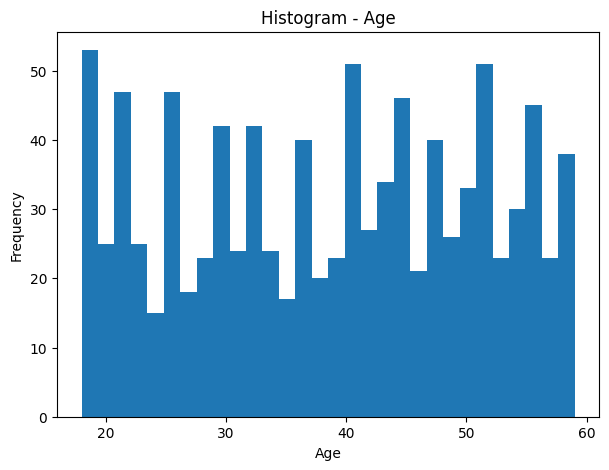

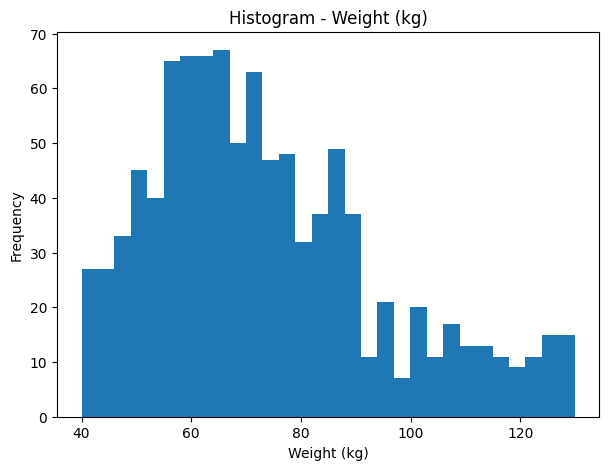

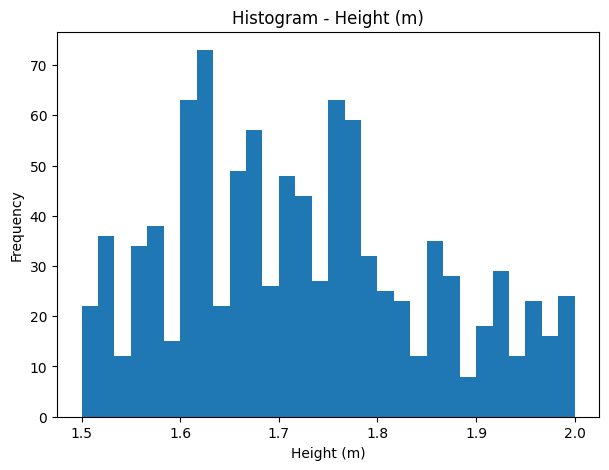

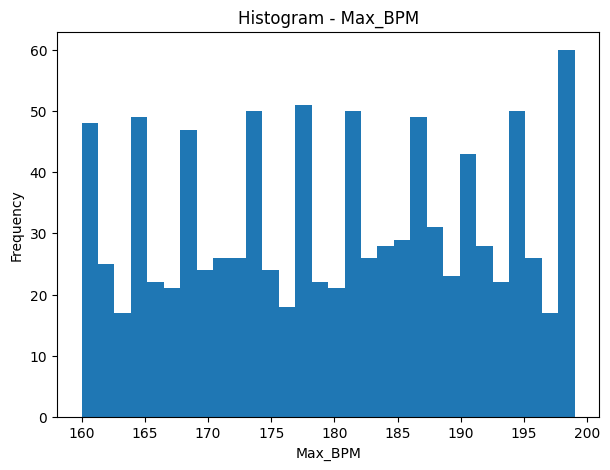

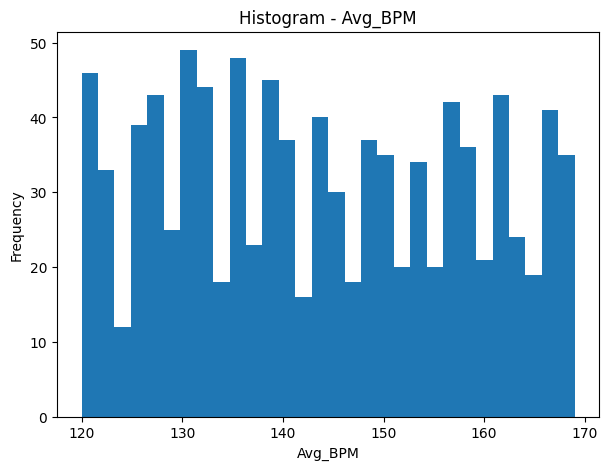

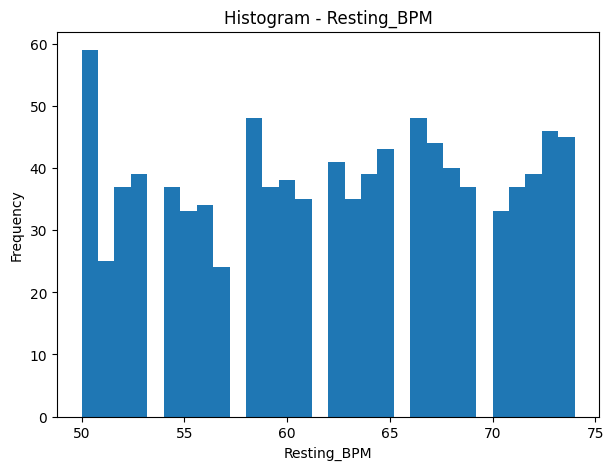

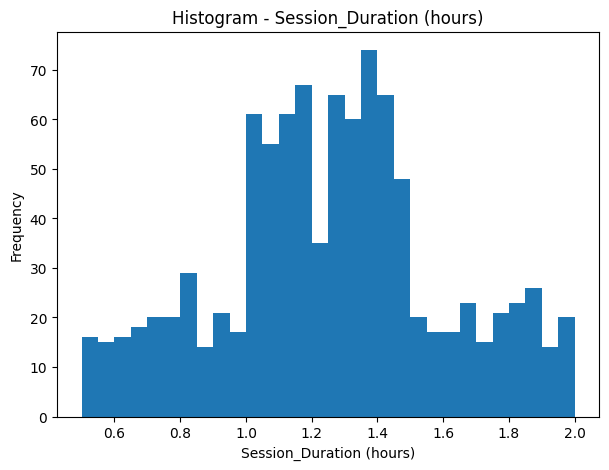

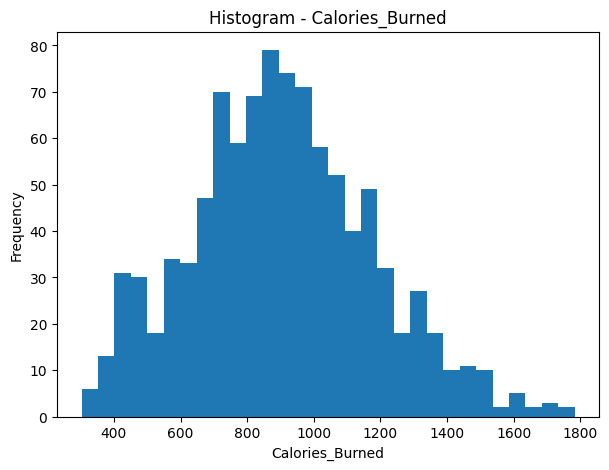

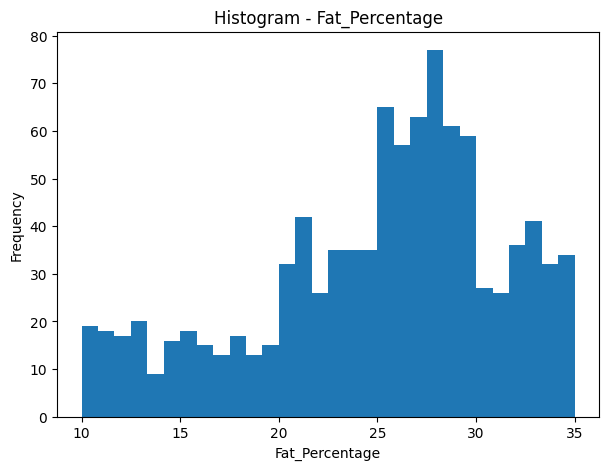

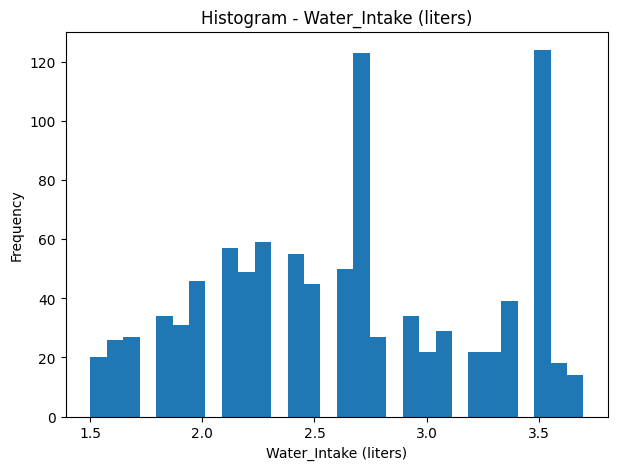

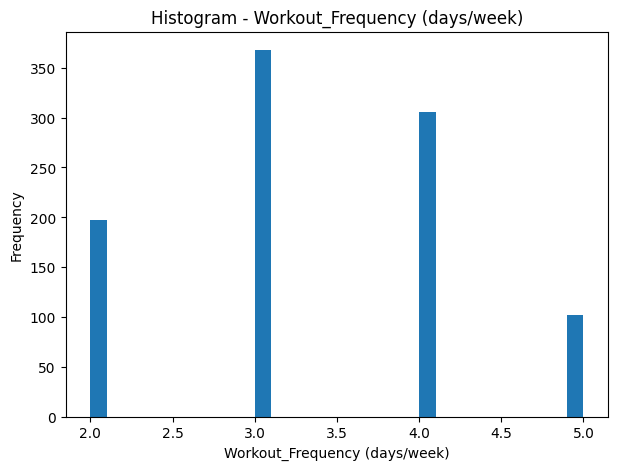

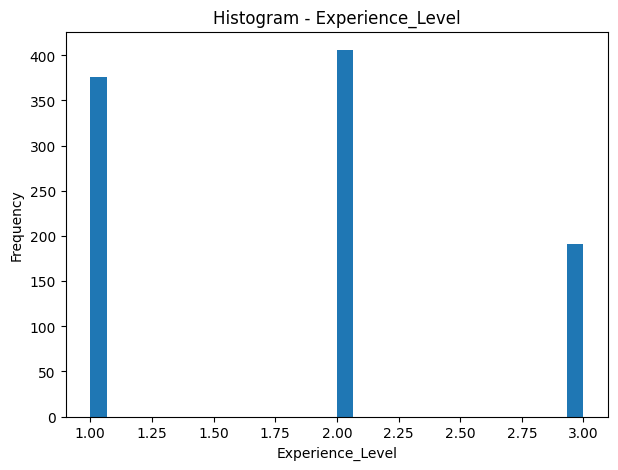

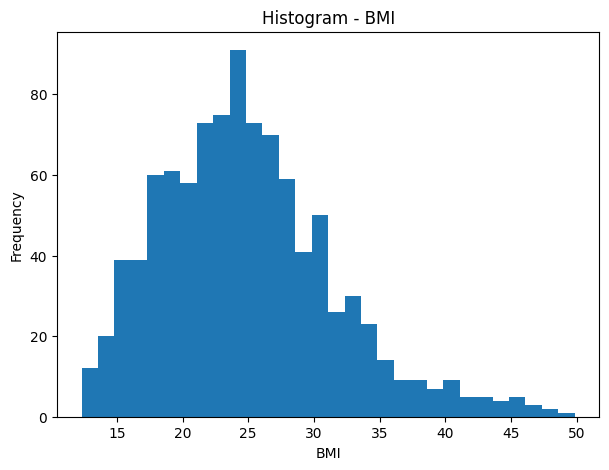

In [35]:

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


## 6) Uç Değer Tespiti (Boxplot)

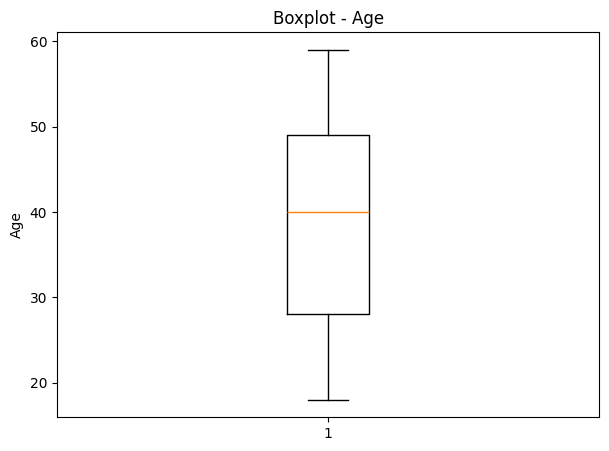

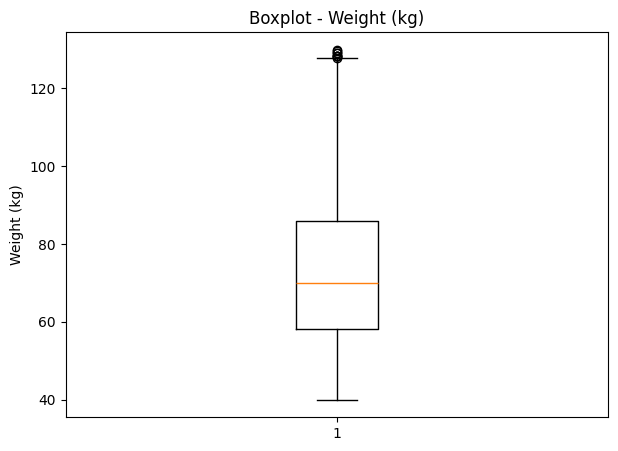

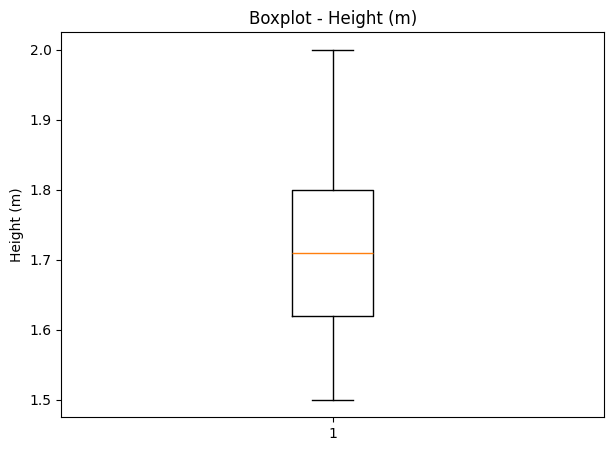

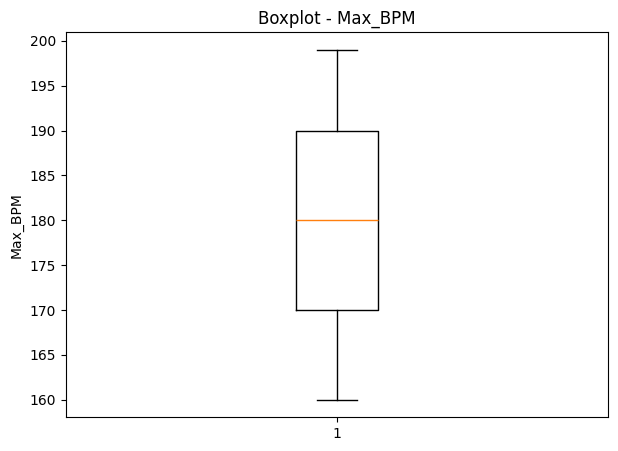

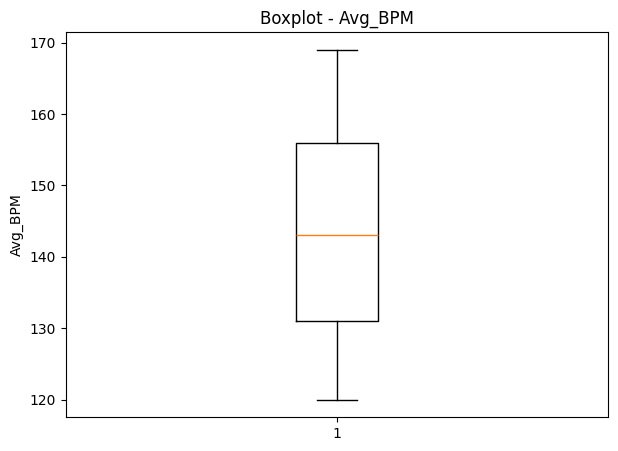

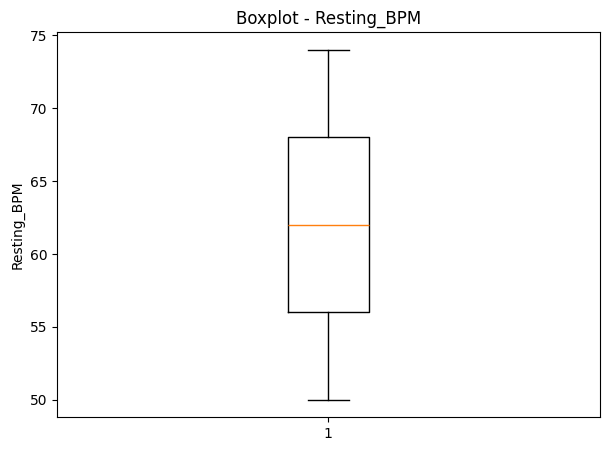

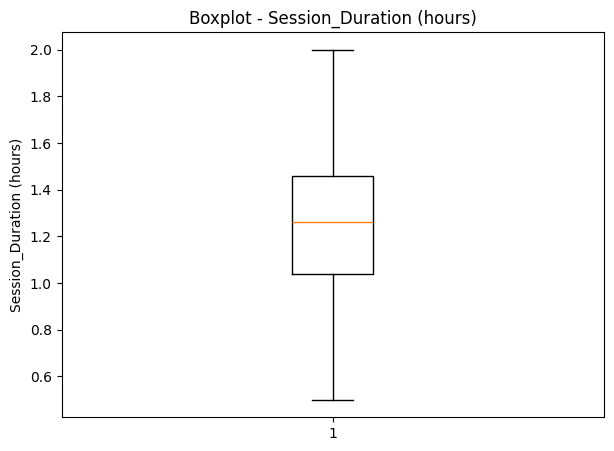

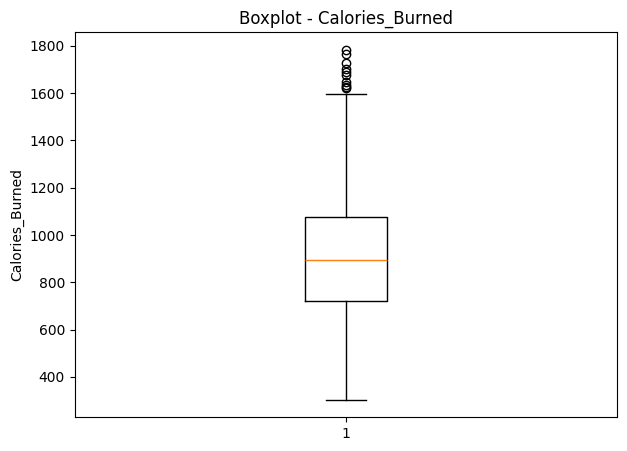

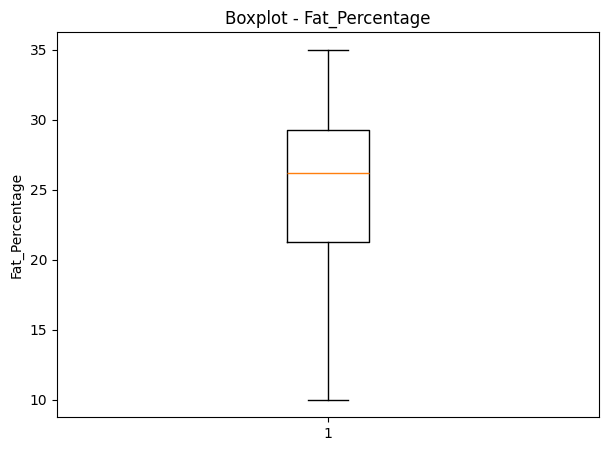

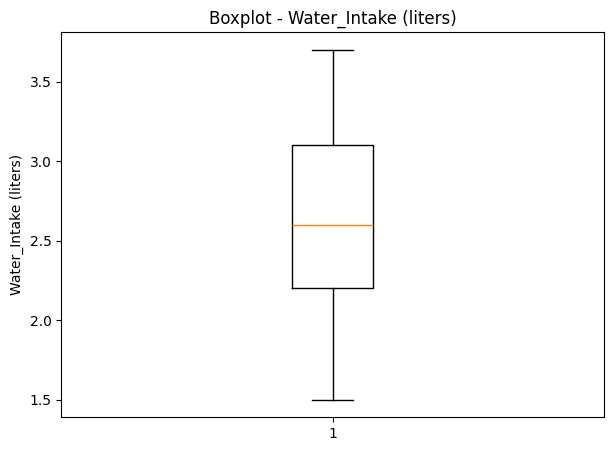

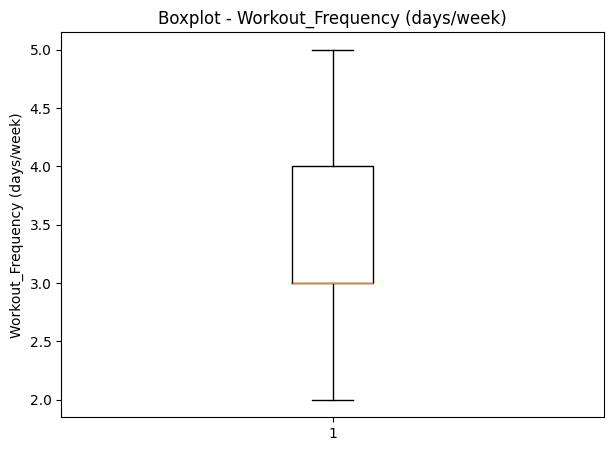

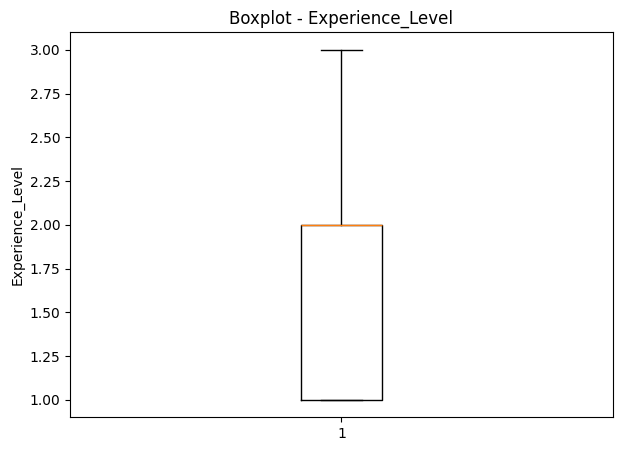

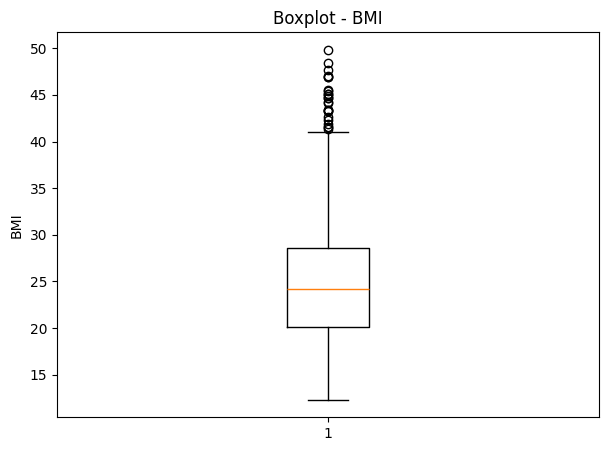

In [36]:

for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.show()


## 7) Kategorik Değişken Dağılımları

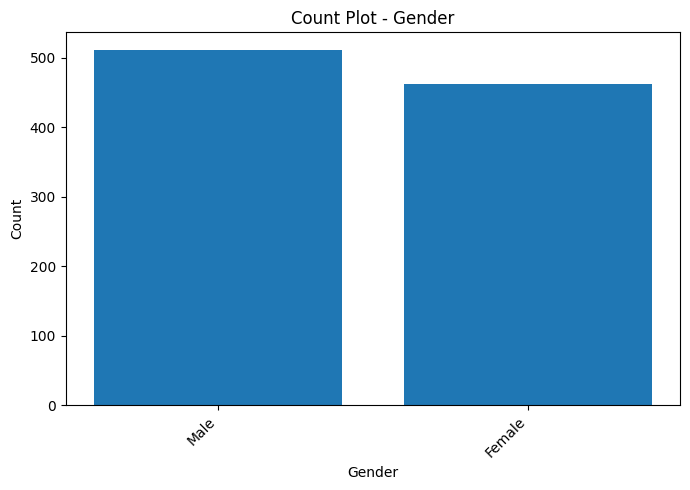

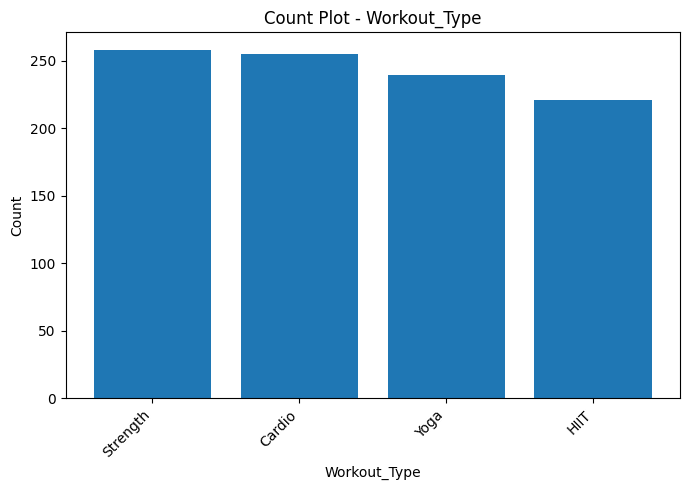

In [37]:

for col in categorical_cols:
    counts = df[col].value_counts()
    plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(f"Count Plot - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


## 8) Egzersiz Türüne Göre İstatistiksel Farklar

In [38]:
# Her egzersiz türü için sayısal değişkenlerin ortalamalarını hesapla
workout_means = df.groupby("Workout_Type")[[
    "Calories_Burned", "Session_Duration (hours)", "Avg_BPM", "Max_BPM",
    "Experience_Level", "Fat_Percentage", "BMI"
]].mean().round(2)

print("Egzersiz Türlerine Göre Ortalama Değerler:")
display(workout_means)



Egzersiz Türlerine Göre Ortalama Değerler:


,Calories_Burned,Session_Duration (hours),Avg_BPM,Max_BPM,Experience_Level,Fat_Percentage,BMI
Workout_Type,,,,,,,
Cardio,884.51,1.22,143.89,179.87,1.75,25.40,25.38
HIIT,925.81,1.29,143.52,180.11,1.84,24.46,25.20
Strength,910.70,1.26,144.31,179.03,1.80,25.46,24.54
Yoga,903.19,1.26,143.27,180.61,1.87,24.48,24.55


## 9) Egzersiz Türüne Göre Scatter Plot

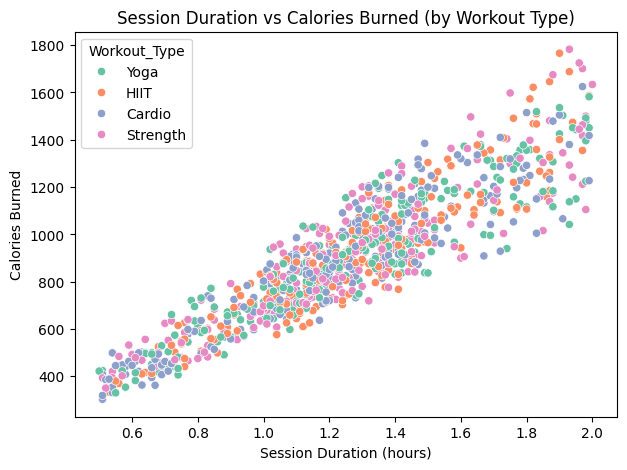

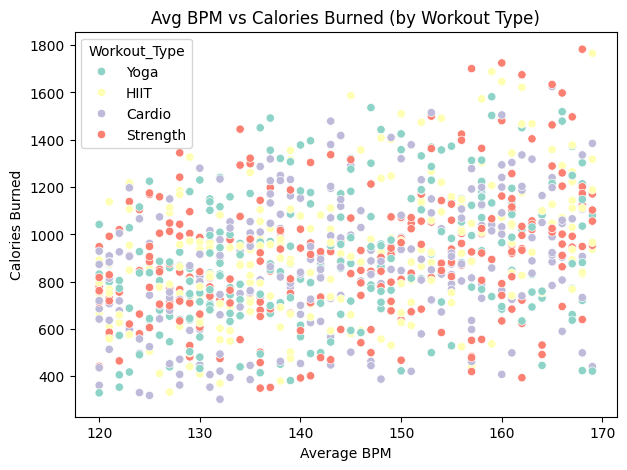

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kalori vs Süre - egzersiz türüne göre renklendirme
sns.scatterplot(
    x="Session_Duration (hours)",
    y="Calories_Burned",
    hue="Workout_Type",
    data=df,
    palette="Set2"
)
plt.title("Session Duration vs Calories Burned (by Workout Type)")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.show()

# Ortalama Nabız vs Kalori
sns.scatterplot(
    x="Avg_BPM",
    y="Calories_Burned",
    hue="Workout_Type",
    data=df,
    palette="Set3"
)
plt.title("Avg BPM vs Calories Burned (by Workout Type)")
plt.xlabel("Average BPM")
plt.ylabel("Calories Burned")
plt.show()




## 10) Workout_Type'a Göre ANOVA

Bu bölümde, kategorik hedef olan `Workout_Type`'a göre bazı sayısal değişkenlerin (gruplar arası) ortalamalarının anlamlı biçimde farklı olup olmadığını test ediyoruz.

**Hipotezler:**
- H₀: Tüm egzersiz türlerinde ortalamalar eşittir (fark yok).
- H₁: En az bir egzersiz türünün ortalaması farklıdır.

**Yorum:** p-değeri < 0.05 ise ilgili değişken için egzersiz türleri arasında anlamlı fark vardır.


In [26]:
# ANOVA testi: Workout_Type gruplarına göre sayısal değişkenler
from scipy.stats import f_oneway
import pandas as pd

target_col = "Workout_Type"
num_cols = [
    "Calories_Burned",
    "Session_Duration (hours)",
    "Avg_BPM",
    "Max_BPM",
    "Resting_BPM",
    "Fat_Percentage",
    "BMI",
    "Age",
    "Water_Intake (liters)",
    "Workout_Frequency (days/week)",
]

print("ANOVA Sonuçları (Workout_Type'a göre):\n")
anova_rows = []

for col in num_cols:
    if col in df.columns:
        # Her egzersiz türü için ilgili kolonun değerlerini al
        groups = [df[df[target_col] == wt][col].dropna() for wt in df[target_col].unique()]
        # En az iki dolu grup ve her grupta >=2 gözlem olmalı
        if len(groups) >= 2 and all(len(g) > 1 for g in groups):
            stat, p = f_oneway(*groups)
            anova_rows.append((col, float(stat), float(p)))
            print(f"{col:<28} F = {stat:8.3f}  |  p = {p:>.6f}  ->  {'Anlamlı fark var' if p < 0.05 else 'Anlamlı fark yok'}")
        else:
            print(f"{col:<28} (gruplar yetersiz / eksik veri)")

# Sonuçları bir tablo halinde de görelim
anova_df = pd.DataFrame(anova_rows, columns=["Feature", "F_stat", "p_value"]).sort_values("p_value")
display(anova_df)


🔎 ANOVA Sonuçları (Workout_Type'a göre):

Calories_Burned              F =    0.949  |  p = 0.416240  ->  ❌ Anlamlı fark yok
Session_Duration (hours)     F =    1.583  |  p = 0.191947  ->  ❌ Anlamlı fark yok
Avg_BPM                      F =    0.248  |  p = 0.862656  ->  ❌ Anlamlı fark yok
Max_BPM                      F =    0.817  |  p = 0.484406  ->  ❌ Anlamlı fark yok
Resting_BPM                  F =    0.765  |  p = 0.513730  ->  ❌ Anlamlı fark yok
Fat_Percentage               F =    1.895  |  p = 0.128750  ->  ❌ Anlamlı fark yok
BMI                          F =    1.060  |  p = 0.365273  ->  ❌ Anlamlı fark yok
Age                          F =    0.825  |  p = 0.479953  ->  ❌ Anlamlı fark yok
Water_Intake (liters)        F =    0.397  |  p = 0.755414  ->  ❌ Anlamlı fark yok
Workout_Frequency (days/week) F =    1.035  |  p = 0.376374  ->  ❌ Anlamlı fark yok


,Feature,F_stat,p_value
5,Fat_Percentage,1.894962,0.128750
1,Session_Duration (hours),1.582679,0.191947
6,BMI,1.059866,0.365273
9,Workout_Frequency (days/week),1.034652,0.376374
0,Calories_Burned,0.949043,0.416240
7,Age,0.825395,0.479953
3,Max_BPM,0.817258,0.484406
4,Resting_BPM,0.765075,0.513730
8,Water_Intake (liters),0.396692,0.755414
2,Avg_BPM,0.248183,0.862656


## 11) Basit Tutarlılık Kontrolleri

In [15]:

# BMI yeniden hesaplanabiliyorsa (Weight / Height^2) ile kıyas
if {"Weight (kg)", "Height (m)", "BMI"}.issubset(df.columns):
    bmi_calc = df["Weight (kg)"] / (df["Height (m)"] ** 2)
    diff = (df["BMI"] - bmi_calc).abs()
    print("BMI farkı (medyan):", round(diff.median(), 3))
    print("BMI farkı (95. persantil):", round(diff.quantile(0.95), 3))



BMI farkı (medyan): 0.002
BMI farkı (95. persantil): 0.005


## 12) Kümelenme (KMeans & DBSCAN)

Bu bölümde, verideki doğal grup yapısını incelemek amacıyla
denetimsiz öğrenme (unsupervised learning) yöntemleri uygulanmıştır.

**Amaç:**
- Egzersiz türleri (`Workout_Type`) etiketleri kullanılmadan, verinin kendi benzerliklerine göre kümelere ayrılıp ayrılmadığını görmek.
- Sayısal özelliklerin kümeler oluşturma eğilimini değerlendirmek.

**Uygulanan Yöntemler:**
- `KMeans` (k = 3, 4, 5): Veriyi belirli sayıda kümeye ayırır, küme içi hata (inertia) incelenir.
- `DBSCAN`: Yoğunluk tabanlı kümeleme; gürültü (noise) noktaları belirlenir.
- `PCA`: Veriyi 2 boyuta indirip kümeleri görselleştirmek için kullanılmıştır.

**Yorum:**
- Eğer KMeans ve DBSCAN sonuçları belirgin kümeler gösteriyorsa, veride güçlü gruplar (örneğin benzer egzersiz profilleri) vardır.  
- Eğer kümeler karışık görünüyorsa, egzersiz türlerinin sayısal özelliklerle iyi ayrılmadığı söylenebilir.


🔹 K-Means Kümeleme Sonuçları:
k=3 -> Küme sayıları: Counter({np.int32(0): 552, np.int32(2): 227, np.int32(1): 194})
k=4 -> Küme sayıları: Counter({np.int32(0): 378, np.int32(1): 209, np.int32(2): 194, np.int32(3): 192})
k=5 -> Küme sayıları: Counter({np.int32(3): 278, np.int32(0): 192, np.int32(1): 172, np.int32(4): 169, np.int32(2): 162})


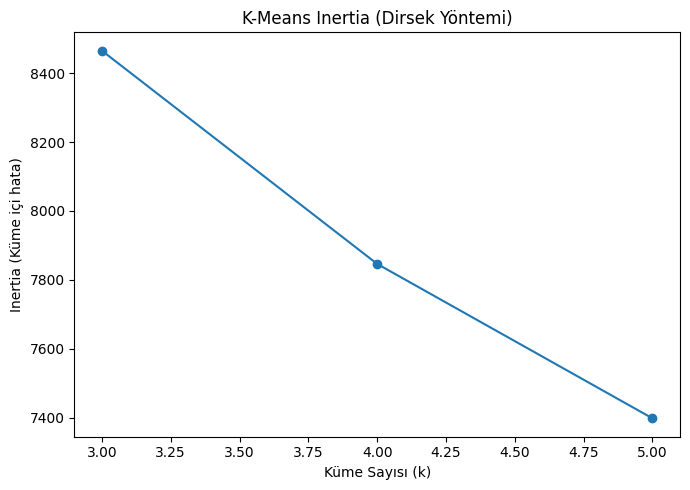


🔹 DBSCAN Kümeleme Sonuçları:
DBSCAN etiketleri (ilk 20): [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
DBSCAN küme dağılımı: Counter({np.int64(-1): 973})  (-1 = Gürültü)


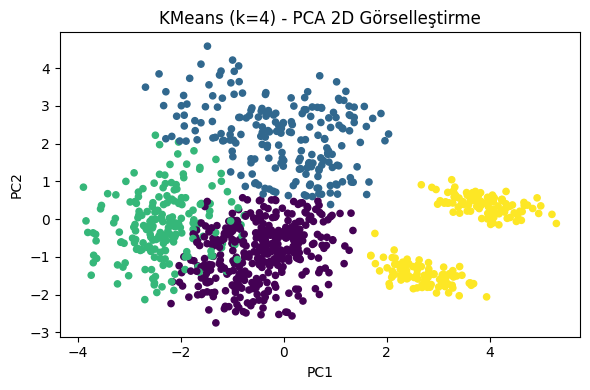

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Kümelenecek özelliklerin seçimi
cluster_features = [c for c in numeric_cols if c not in []]
Xc = df[cluster_features].copy()

# Eksik verileri doldur ve ölçekle
clust_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
Xc_t = clust_pipe.fit_transform(Xc)

# K-Means kümeleme: k = 3, 4, 5
ks = [3, 4, 5]
inertia_values = []

print("K-Means Kümeleme Sonuçları:")
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(Xc_t)
    inertia_values.append(km.inertia_)
    labels = km.labels_
    print(f"k={k} -> Küme sayıları: {Counter(labels)}")

# Elbow (Dirsek) yöntemi grafiği
plt.figure()
plt.plot(ks, inertia_values, marker='o')
plt.title("K-Means Inertia (Dirsek Yöntemi)")
plt.xlabel("Küme Sayısı (k)")
plt.ylabel("Inertia (Küme içi hata)")
plt.tight_layout()
plt.show()

# DBSCAN kümeleme denemesi
print("\n🔹 DBSCAN Kümeleme Sonuçları:")
db = DBSCAN(eps=1.5, min_samples=10).fit(Xc_t)
db_labels = db.labels_
print(f"DBSCAN etiketleri (ilk 20): {db_labels[:20]}")
print(f"DBSCAN küme dağılımı: {Counter(db_labels)}  (-1 = Gürültü)")

# PCA ile 2 boyuta indirip görselleştirme
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xc_t)

# KMeans (k=4) sonuçlarını görselleştir
km = KMeans(n_clusters=4, random_state=42, n_init=10).fit(Xc_t)
lbl = km.labels_

plt.figure(figsize=(6, 4))
plt.scatter(X2[:, 0], X2[:, 1], c=lbl, s=20, cmap="viridis")
plt.title("KMeans (k=4) - PCA 2D Görselleştirme")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


## 13) Korelasyon Analizi

Bu bölümde, veri setindeki **sayısal değişkenler arasındaki ilişkiler** incelenmiştir.  
Korelasyon analizi, değişkenlerin birlikte nasıl değiştiğini gösterir ve
modelleme aşamasında **birbirine çok benzeyen (yüksek korelasyonlu)** değişkenleri tespit etmek için önemlidir.

**Amaç:**
- Verideki olası çoklu doğrusal ilişkileri belirlemek  
- Hangi değişkenlerin birlikte güçlü biçimde değiştiğini görmek  
- Modelde hangi özelliklerin önemli olabileceğine dair ön fikir elde etmek  

> Korelasyon katsayısı:  
> - **+1** → güçlü pozitif ilişki (biri artarken diğeri artar)  
> - **-1** → güçlü negatif ilişki (biri artarken diğeri azalır)  
> - **0** → ilişki yok


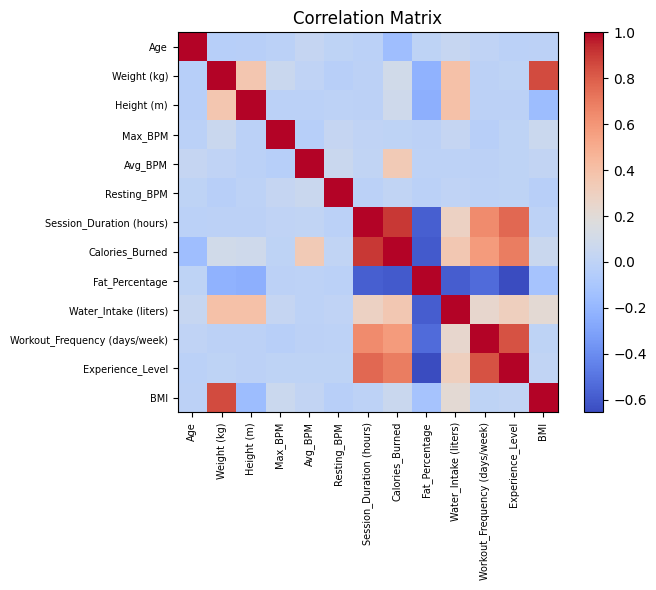

🔹 En yüksek korelasyon gösteren ilk 10 değişken çifti:
Calories_Burned                Session_Duration (hours)         0.908140
Session_Duration (hours)       Calories_Burned                  0.908140
Weight (kg)                    BMI                              0.853158
BMI                            Weight (kg)                      0.853158
Workout_Frequency (days/week)  Experience_Level                 0.837079
Experience_Level               Workout_Frequency (days/week)    0.837079
                               Session_Duration (hours)         0.764768
Session_Duration (hours)       Experience_Level                 0.764768
Calories_Burned                Experience_Level                 0.694129
Experience_Level               Calories_Burned                  0.694129
dtype: float64


In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Korelasyon matrisi oluşturma
corr = df[numeric_cols].corr(numeric_only=True)

# Görselleştirme (Heatmap)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(corr, interpolation='nearest', cmap='coolwarm')
ax.set_title('Correlation Matrix', fontsize=12)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=7)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=7)
fig.colorbar(cax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# En yüksek korelasyon gösteren değişken çiftlerini listeleme
corr_unstack = corr.where(~np.eye(corr.shape[0], dtype=bool))
pairs = (
    corr_unstack.unstack()
    .dropna()
    .abs()
    .sort_values(ascending=False)
)
print("En yüksek korelasyon gösteren ilk 10 değişken çifti:")
print(pairs.head(10))


## 14) Önemli Gözlemler ve İçgörüler

### Genel Veri Gözlemleri
- Veri setinde **eksik değer bulunmamaktadır**, bu da veri kalitesinin yüksek olduğunu göstermektedir.  
- **Cinsiyet dağılımı** dengelidir; egzersiz türleri açısından da benzer bir dağılım gözlenmiştir.  
- **Uç değer (outlier)** sayısı düşüktür, veri genellikle tutarlı bir dağılım göstermektedir.
- **BMI (Vücut Kitle İndeksi)** değerleri, `Weight / Height²` formülüyle yeniden hesaplandığında neredeyse birebir uyum göstermektedir (medyan fark ≈ 0.002).  
  ➜ Bu, verinin güvenilir biçimde oluşturulduğunu gösterir.
- Egzersiz süresi arttıkça **yakılan kalori** de belirgin biçimde artmaktadır.  
  ➜ Bu ilişki, beklenen fiziksel davranışla uyumludur.
- **Deneyim seviyesi** yüksek olan kullanıcılar genellikle daha uzun egzersiz yapar ve daha fazla kalori yakar.

---

### Korelasyon Analizi Sonuçları
Korelasyon matrisi incelendiğinde değişkenler arasında anlamlı ilişkiler gözlenmiştir:

- **Calories_Burned** ile **Session_Duration (hours)** arasında **çok güçlü pozitif korelasyon (≈ 0.90)** bulunmuştur.  
  ➜ Egzersiz süresi arttıkça yakılan kalori de artmaktadır.
- **Weight (kg)** ve **BMI** arasında yüksek korelasyon (**≈ 0.85**) vardır.  
  ➜ BMI’nin büyük ölçüde ağırlığa dayalı olarak hesaplandığını doğrular.
- **Experience_Level** ve **Workout_Frequency (days/week)** arasında da güçlü pozitif ilişki (**≈ 0.83**) görülmüştür.  
  ➜ Deneyim seviyesi yüksek kişiler, daha sık egzersiz yapma eğilimindedir.

Genel olarak, korelasyon yapısı tutarlıdır ve değişkenler arasında **mantıklı ilişkiler** mevcuttur.

---

### ANOVA Analizi (Workout_Type’a Göre)
Farklı egzersiz türlerinin (`Workout_Type`) sayısal metrikler üzerindeki etkisi incelenmiştir.

- Tüm değişkenlerde **p-değeri > 0.05** çıkmıştır.  
  ➜ Egzersiz türleri arasında istatistiksel olarak anlamlı fark **yoktur**.  

#### Yorum:
- Farklı türlerde (ör. Cardio, Strength, Yoga, HIIT) yakılan kalori, ortalama nabız ve egzersiz süresi değerleri **benzer düzeydedir**.  
- Bu durum, türlerin ya **benzer şekilde kaydedilmiş** olabileceğini  
  ya da mevcut ölçümlerin türleri ayırt etmek için **yeterince ayırt edici olmadığını** göstermektedir.

---

### Kümelenme (KMeans & DBSCAN) Analizi
Veride doğal gruplar olup olmadığını görmek için denetimsiz öğrenme yöntemleri uygulanmıştır.

- **KMeans (k=3,4,5)** için “Dirsek (Elbow)” grafiğinde belirgin bir kırılma noktası gözlenmemiştir.  
  ➜ Veri doğal olarak net kümelere ayrılmamaktadır.
- **DBSCAN** analizinde gözlemlerin büyük bölümü `-1` (gürültü) olarak etiketlenmiştir.  
  ➜ Yoğunluk bazlı kümeler de belirgin biçimde oluşmamıştır.
- **PCA (2D)** görselleştirmesinde kümelerin iç içe geçtiği ve açık sınırlarla ayrılmadığı görülmüştür.

#### Yorum:
Veri, doğal olarak belirgin alt gruplar (cluster) içermemektedir.  
Bu durum, egzersiz türlerinin (Workout_Type) sayısal verilerle **açık şekilde ayrışmadığını** göstermektedir.

---

### Genel Değerlendirme ve Yapılabilecekler
- Mevcut veri seti **tutarlı ve temiz** olmasına rağmen, egzersiz türleri arasında belirgin farklar gözlenmemektedir.  
- Bu nedenle, **egzersiz türü tahmini (classification)** yapılmak istenirse:
  - Ek özellikler (ör. `Calories_Burned / Session_Duration`, `Avg_BPM / Max_BPM` oranı, “yoğunluk skoru”) eklenmelidir.  
  - Egzersiz türleri arasında ayrımı güçlendirmek için **özellik mühendisliği (feature engineering)** önerilir.  
  - Modelleme öncesi **veri ölçekleme (normalization)** ve **boyut indirgeme (PCA)** performansı artırabilir.
- ANOVA ve kümeleme sonuçları birlikte değerlendirildiğinde, egzersiz türlerini ayırmak için **mevcut değişkenler yetersiz** görünmektedir.

---

### Sonuç
Bu veri seti, egzersiz performansını tanımlamak ve genel kullanıcı eğilimlerini anlamak için oldukça elverişlidir.  
Ancak, egzersiz türlerini (Workout_Type) doğrudan ayırt etmek veya tahmin etmek için mevcut değişkenler yeterince güçlü değildir.  

Dolayısıyla, gelecekteki modelleme aşamalarında:
- Egzersiz yoğunluğu veya süre/kalori oranı gibi metrikler kullanılmalıdır.  

Bu analizler, veri setinin güçlü yönlerini (temizlik, tutarlılık, içsel korelasyonlar)  
ve zayıf yönlerini (türler arası ayrışma eksikliği) açık biçimde ortaya koymaktadır.